# Import Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Load Dataset


In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Describe Dataset Features

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Histogram of Features

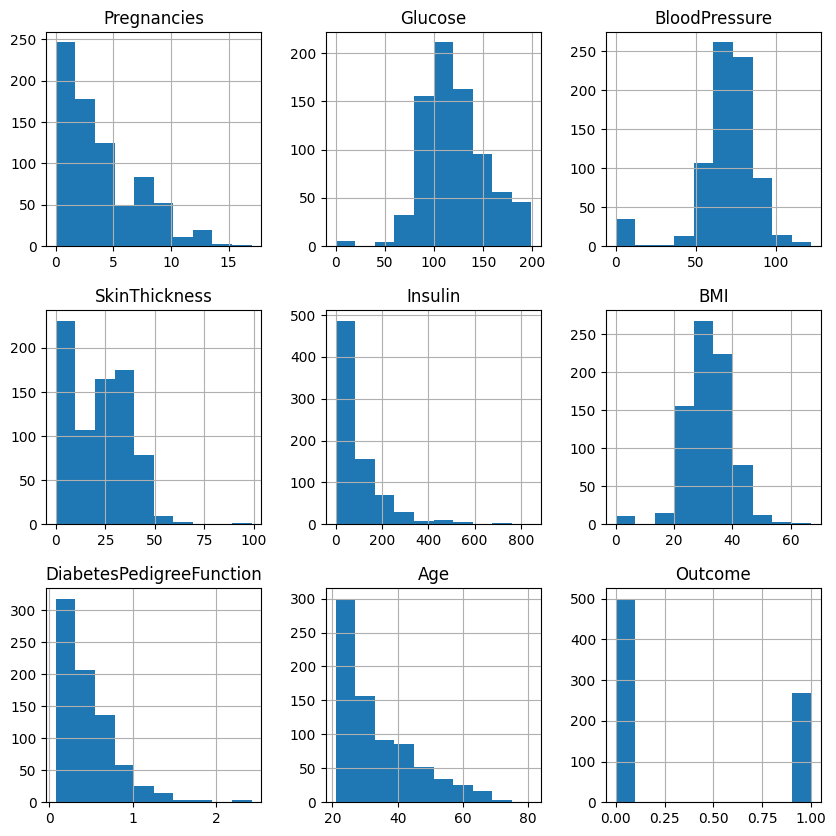

In [4]:
df.hist(figsize=(10,10))
plt.show()

# Bar Plot for Target

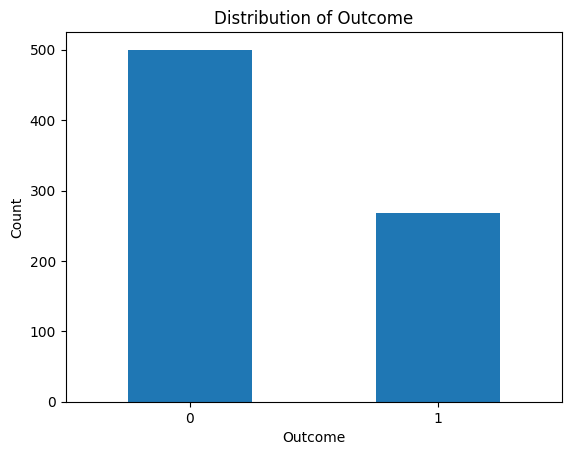

In [5]:
df['Outcome'].value_counts().plot(kind='bar')
plt.title('Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Data Quality

**Μηδενικές τιμές σε κρίσιμες μεταβλητές:** Παρατηρούμε ότι μεταβλητές όπως η Γλυκόζη (Glucose), η Αρτηριακή Πίεση (BloodPressure), το Πάχος Δέρματος (SkinThickness), η Ινσουλίνη (Insulin) και ο Δείκτης Μάζας Σώματος (BMI) έχουν ελάχιστη τιμή 0. Στην πραγματικότητα, αυτές οι μετρήσεις δεν μπορούν να είναι μηδέν για έναν ζωντανό άνθρωπο, υποδεικνύοντας την παρουσία ελλειπόντων ή λανθασμένων τιμών που έχουν κωδικοποιηθεί ως 0. Αυτό μπορεί να επηρεάσει την ανάλυση και τα αποτελέσματα του μοντέλου.

**Μεγάλη διακύμανση σε ορισμένες μεταβλητές:** Ορισμένες μεταβλητές, όπως η Ινσουλίνη (Insulin), έχουν πολύ μεγάλη τυπική απόκλιση (std) σε σχέση με τη μέση τιμή (mean). Αυτό υποδηλώνει μεγάλη διασπορά των δεδομένων και πιθανή ύπαρξη ακραίων τιμών (outliers) που μπορεί να επηρεάσουν τα στατιστικά συμπεράσματα και την απόδοση ενός μοντέλου μηχανικής μάθησης.

**Συμπέρασμα:** Λαμβάνοντας υπόψη τα παραπάνω, το συμπέρασμα είναι ότι η ποιότητα των δεδομένων δεν είναι ιδανική για άμεση χρήση σε μοντέλα μηχανικής μάθησης. Η παρουσία μηδενικών τιμών σε μεταβλητές που δεν θα έπρεπε να έχουν τέτοιες τιμές, καθώς και η μεγάλη διακύμανση σε ορισμένες μεταβλητές, υποδηλώνουν την ανάγκη για περαιτέρω επεξεργασία δεδομένων, όπως ο χειρισμός των ελλειπόντων τιμών και η αντιμετώπιση των ακραίων τιμών, πριν από την εφαρμογή μοντέλων.

# Age Distribution

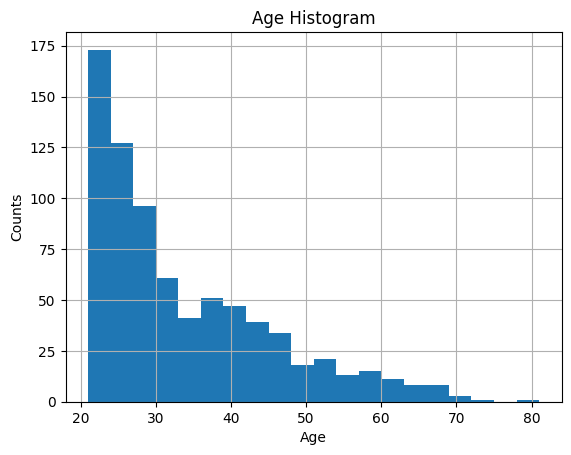

In [6]:
df['Age'].hist(bins=20)
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()

Βλέποντας το ιστόγραμμα της μεταβλητής Age (όπως φαίνεται στο παραπάνω γράφημα), παρατηρούμε ότι η κατανομή είναι ασύμμετρη προς τα δεξιά (right-skewed). Αυτό σημαίνει ότι υπάρχει μια μεγαλύτερη συγκέντρωση ατόμων σε νεότερες ηλικίες, ενώ υπάρχει μια μακρά "ουρά" προς τις μεγαλύτερες ηλικίες.

 Η κατανομή δεν είναι ιδανικη για την κατασκευή της συγκεκριμένης εφαρμογής καθώς μπορεί να σημαίνει ότι έχουμε λιγότερα δεδομένα για άτομα μεγαλύτερης ηλικίας, κάτι που μπορεί να επηρεάσει την ικανότητα του μοντέλου να προβλέψει με ακρίβεια για αυτήν την ομάδα.

# High Insulin

Μέσος όρος Γλυκόζης ανά Outcome (0: Όχι διαβήτης, 1: Διαβήτης):
Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64


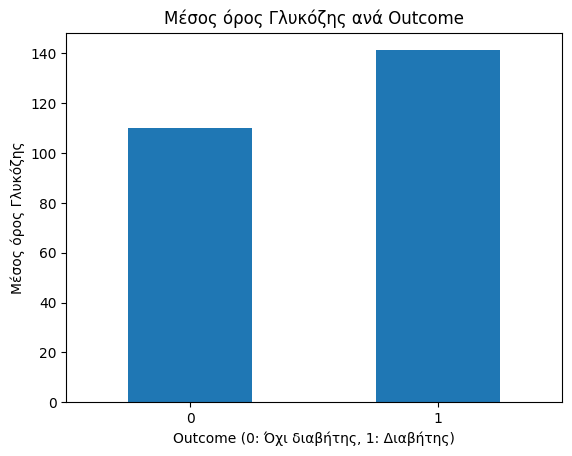

In [7]:
glucose_by_outcome = df.groupby('Outcome')['Glucose'].mean()

print("Μέσος όρος Γλυκόζης ανά Outcome (0: Όχι διαβήτης, 1: Διαβήτης):")
print(glucose_by_outcome)

glucose_by_outcome.plot(kind='bar')
plt.title('Μέσος όρος Γλυκόζης ανά Outcome')
plt.xlabel('Outcome (0: Όχι διαβήτης, 1: Διαβήτης)')
plt.ylabel('Μέσος όρος Γλυκόζης')
plt.xticks(rotation=0)
plt.show()

Όπως απεικονίζεται στο παραπάνω γράφημα, ο μέσος όρος της γλυκόζης για τα άτομα με διαβήτη (Outcome 1) είναι σημαντικά υψηλότερος σε σύγκριση με τον μέσο όρο για τα άτομα που δεν έχουν διαβήτη (Outcome 0). Αυτή η παρατήρηση από τα δεδομένα επιβεβαιώνει τα ευρήματα των κλινικών μελετών που συνδέουν τα υψηλά επίπεδα γλυκόζης με την πιθανότητα εμφάνισης διαβήτη.

# Convert DataFrame to Numpy arrays

In [8]:
input_df = df.drop(columns=['Outcome'])
targets_df = df['Outcome']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((768, 8), (768,))

# Split Dataset to Train-Test

In [9]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
print("Πλήθος Παραδειγμάτων Εκπαίδευσης:", x_train.shape[0])
print("Πλήθος Παραδειγμάτων Επικύρωσης", x_test.shape[0])

Πλήθος Παραδειγμάτων Εκπαίδευσης: 537
Πλήθος Παραδειγμάτων Επικύρωσης 231


# Create and Train a Logistic Regression Model

In [10]:
model = LogisticRegression(max_iter=1000, random_state=seed)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

# Predictions on Train and Test Set


In [11]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Accuracy on Train and Test Set

In [12]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Η ακρίβεια του μοντέλου για το train set είναι: {train_accuracy:.4f}')
print(f'Η ακρίβεια του μοντέλου για το test set είναι: {test_accuracy:.4f}')

Η ακρίβεια του μοντέλου για το train set είναι: 0.7654
Η ακρίβεια του μοντέλου για το test set είναι: 0.7792


Συγκρίνοντας τις δύο τιμές, παρατηρούμε ότι η ακρίβεια στο test set είναι ελαφρώς υψηλότερη από αυτή του train set. Αυτό είναι ένα θετικό σημάδι, καθώς υποδηλώνει ότι το μοντέλο δεν έχει υπερεκπαιδευτεί (overfit) στα δεδομένα εκπαίδευσης και μπορεί να αποδώσει καλά και σε νέα δεδομένα. Είναι δηλαδή ενθαρρυντικό για την ικανότητα γενίκευσης του μοντέλου.

# Accuracy per Age Groups


In [13]:
# Create a mask that filters patients with age < 25. Age is found at x_test[:, 7]
age_index = 7
mask_25 = x_test[:, age_index] < 25
x_test_25 = x_test[mask_25]
y_test_25 = y_test[mask_25]
y_pred_25 = model.predict(x_test_25)

accuracy_0_25 = accuracy_score(y_test_25, y_pred_25)
accuracy_percentage = round(accuracy_0_25*100, 2)

print(f'Η ακρίβεια του μοντέλου για την ηλικιακή ομάδα 0-25 είναι: {accuracy_percentage}')

mask_25_50 = (x_test[:, age_index] >= 25) & (x_test[:, age_index] < 50)
x_test_25_50 = x_test[mask_25_50]
y_test_25_50 = y_test[mask_25_50]
y_pred_25_50 = model.predict(x_test_25_50)

accuracy_25_50 = accuracy_score(y_test_25_50, y_pred_25_50)
accuracy_percentage_25_50 = round(accuracy_25_50 * 100, 2)

print(f'Η ακρίβεια του μοντέλου για την ηλικιακή ομάδα  25-50 είναι: {accuracy_percentage_25_50}')

mask_50_plus = x_test[:, age_index] >= 50
x_test_50_plus = x_test[mask_50_plus]
y_test_50_plus = y_test[mask_50_plus]
y_pred_50_plus = model.predict(x_test_50_plus)

accuracy_50_plus = accuracy_score(y_test_50_plus, y_pred_50_plus)
accuracy_percentage_50_plus = round(accuracy_50_plus * 100, 2)

print(f'Η ακρίβεια του μοντέλου για την ηλικιακή ομάδα  50+ είναι: {accuracy_percentage_50_plus}')

Η ακρίβεια του μοντέλου για την ηλικιακή ομάδα 0-25 είναι: 83.78
Η ακρίβεια του μοντέλου για την ηλικιακή ομάδα  25-50 είναι: 72.93
Η ακρίβεια του μοντέλου για την ηλικιακή ομάδα  50+ είναι: 87.5


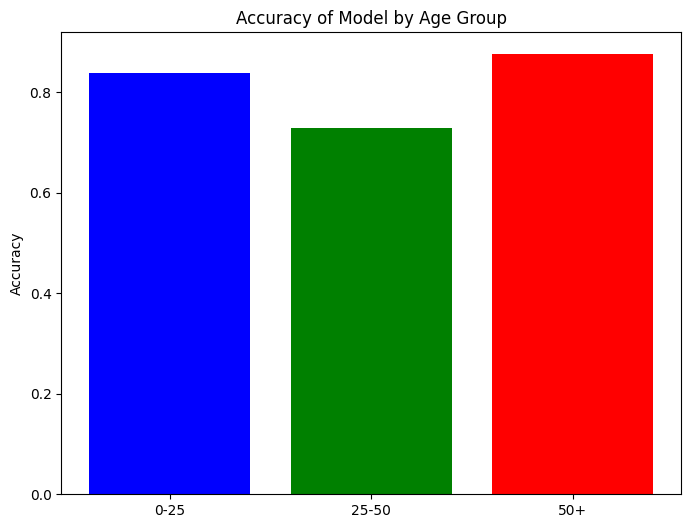

In [14]:
age_groups = ['0-25', '25-50', '50+']
accuracies = [accuracy_0_25, accuracy_25_50, accuracy_50_plus]

plt.figure(figsize=(8, 6))
plt.bar(age_groups, accuracies, color=['blue', 'green', 'red'])
plt.ylabel('Accuracy')
plt.title('Accuracy of Model by Age Group')
plt.show()

# Recall vs Precision

**Το χειρότερο σενάριο είναι να προβλέψει το μοντέλο ότι κάποιος ασθενής δεν έχει διαβήτη, ενώ στην πραγματικότητα έχει (Ψευδώς Αρνητικό - False Negative).**

Ένα Ψευδώς Αρνητικό αποτέλεσμα σημαίνει ότι ένας ασθενής με διαβήτη δεν θα διαγνωστεί έγκαιρα. Αυτό μπορεί να οδηγήσει σε καθυστέρηση στη θεραπεία και στην αντιμετώπιση της νόσου, με αποτέλεσμα την εμφάνιση σοβαρών επιπλοκών στην υγεία του ασθενούς. Αντίθετα, ένα Ψευδώς Θετικό αποτέλεσμα (να προβλεφθεί διαβήτης ενώ δεν υπάρχει) μπορεί να προκαλέσει άγχος στον ασθενή και να οδηγήσει σε περαιτέρω εξετάσεις, αλλά δεν έχει τις ίδιες σοβαρές και δυνητικά μη αναστρέψιμες επιπτώσεις στην υγεία όπως ένα Ψευδώς Αρνητικό. Είναι προτιμότερο να γίνουν κάποιες επιπλέον εξετάσεις για να αποκλειστεί ο διαβήτης, παρά να παραμείνει αδιάγνωστος σε έναν ασθενή που πραγματικά τον έχει.


# Different Seeds

In [15]:
train_accuracies = []
test_accuracies = []

for current_seed in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=current_seed)

    model = LogisticRegression(max_iter=1000, random_state=current_seed)
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

mean_test_accuracy = np.mean(test_accuracies)
std_test_accuracy = np.std(test_accuracies)

print(f'Μέσος όρος ακρίβειας στο test set για 10 διαφορετικά seeds: {mean_test_accuracy:.4f}')
print(f'Τυπική απόκλιση ακρίβειας στο test set για 10 διαφορετικά seeds: {std_test_accuracy:.4f}')

Μέσος όρος ακρίβειας στο test set για 10 διαφορετικά seeds: 0.7727
Τυπική απόκλιση ακρίβειας στο test set για 10 διαφορετικά seeds: 0.0187


# Normalization

In [16]:
scaler = MinMaxScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)

print("Κανονικοποιημένα δεδομένα:")
print(x_train_normalized[:])

Κανονικοποιημένα δεδομένα:
[[0.71428571 0.45454545 0.77272727 ... 0.52011923 0.3172089  0.58333333]
 [0.         0.36868687 0.         ... 0.31445604 0.11044521 0.06666667]
 [0.42857143 0.54040404 0.8        ... 0.54843517 0.27525685 0.16666667]
 ...
 [0.5        0.48989899 0.69090909 ... 0.609538   0.33690068 0.18333333]
 [0.21428571 0.5        0.56363636 ... 0.32488823 0.08347603 0.08333333]
 [0.07142857 0.55050505 0.54545455 ... 0.37853949 0.36943493 0.        ]]


In [17]:
model_normalized = LogisticRegression(max_iter=1000, random_state=seed)
model_normalized.fit(x_train_normalized, y_train)

coefficients = model_normalized.coef_[0]
feature_names = input_df.columns
coefficients_series = pd.Series(coefficients, index=feature_names)

abs_coefficients_series = coefficients_series.abs()
sorted_features = abs_coefficients_series.sort_values(ascending=False)

top_3_features = sorted_features.head(3)

print("Οι 3 πιο σημαντικοί παράγοντες που επηρεάζουν την πρόβλεψη του διαβήτη:")
display(top_3_features)

Οι 3 πιο σημαντικοί παράγοντες που επηρεάζουν την πρόβλεψη του διαβήτη:


,0
Glucose,4.707621
BMI,3.177539
DiabetesPedigreeFunction,1.385726


**Αιτιολογηση:** Coefficient (Συντελεστής): Στη Λογιστική Παλινδρόμηση (και σε άλλα γραμμικά μοντέλα), κάθε χαρακτηριστικό (όπως Γλυκόζη, BMI, Ηλικία, κ.λπ.) αντιστοιχίζεται ένας συντελεστής. Αυτός ο συντελεστής αντιπροσωπεύει πόσο "βαρύτητα" ή πόση επίδραση έχει αυτό το συγκεκριμένο χαρακτηριστικό στην τελική πρόβλεψη (στην περίπτωσή μας, την πιθανότητα διαβήτη).

Απόλυτη τιμή του συντελεστή: Όταν θέλουμε να δούμε πόσο ισχυρή είναι η επίδραση ενός χαρακτηριστικού στην πρόβλεψη, ανεξάρτητα από το αν αυτή η επίδραση είναι θετική ή αρνητική, κοιτάμε την απόλυτη τιμή του συντελεστή. Μια μεγάλη απόλυτη τιμή συντελεστή σημαίνει ότι το χαρακτηριστικό έχει μεγάλη επίδραση στην πρόβλεψη, είτε αυξάνοντας είτε μειώνοντας την πιθανότητα του αποτελέσματος. Μια μικρή απόλυτη τιμή συντελεστή σημαίνει μικρή επίδραση.

**Για τους παραπανω λογους οι 3 πιο σημαντικοι παράγοντες είναι αυτοι με την μεγαλύτερη τιμή του απόλυτου συντελεστή τους.**

# Linear Regression

In [18]:
input_features = ['Pregnancies', 'BloodPressure', 'BMI', 'Age']
x = df[input_features].to_numpy()
y = df['Glucose'].to_numpy()

seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

print("Πλήθος Παραδειγμάτων Εκπαίδευσης:", x_train.shape[0])
print("Πλήθος Παραδειγμάτων Επικύρωσης:", x_test.shape[0])

Πλήθος Παραδειγμάτων Εκπαίδευσης: 537
Πλήθος Παραδειγμάτων Επικύρωσης: 231


# Import Extra Libraries

In [19]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Linear Regression Model

In [20]:
model_linear = LinearRegression()
model_linear.fit(x_train, y_train)

y_test_pred_linear = model_linear.predict(x_test)

# Evaluation with Different Metrics

In [21]:
mse = mean_squared_error(y_test, y_test_pred_linear)
mae = mean_absolute_error(y_test, y_test_pred_linear)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

Mean Squared Error (MSE): 929.8883
Mean Absolute Error (MAE): 23.6000


# Better Metric

To MAE δίνει μια πιο άμεση και ερμηνεύσιμη εικόνα της μέσης απόκλισης στην αρχική κλίμακα της μεταβλητής-στόχου (Γλυκόζη). Ένα MAE 23.60 σημαίνει ότι, κατά μέσο όρο, οι προβλέψεις μας για την ποσότητα γλυκόζης αποκλίνουν κατά περίπου 23.60 μονάδες από τις πραγματικές τιμές. Αυτή η τιμή είναι πιο εύκολο να κατανοηθεί και να συσχετιστεί με την κλινική σημασία των επιπέδων γλυκόζης.

Αντίθετα, το MSE (929.89) είναι μια τετράγωνη τιμή και δεν ερμηνεύεται άμεσα ως απόκλιση στην κλίμακα της γλυκόζης. Επιπλέον, το υψηλό MSE σε σχέση με το MAE (σχεδόν 40 φορές μεγαλύτερο στην προκειμένη περίπτωση) υποδηλώνει την πιθανή παρουσία κάποιων μεγαλύτερων λαθών στις προβλέψεις, τα οποία το MSE "τιμωρεί" περισσότερο. Εφόσον το MAE είναι λιγότερο ευαίσθητο σε αυτές τις ακραίες αποκλίσεις, παρέχει μια πιο σταθερή εικόνα της μέσης απόδοσης του μοντέλου.

Συνοψίζοντας, ενώ και οι δύο μετρικές δίνουν πληροφορίες για την απόδοση, το MAE είναι πιο κατανοητό, λιγότερο ευαίσθητο σε ακραίες τιμές και, στην περίπτωση αυτή, πιο κατάλληλο για να εκτιμήσουμε την τυπική απόκλιση των προβλέψεών μας από τις πραγματικές τιμές γλυκόζης.

# Laso Regression

In [22]:
alpha_values = [0.2, 0.4, 0.6, 0.8, 1.0]

results = []

for alpha in alpha_values:
    model_lasso = Lasso(alpha=alpha, random_state=seed)
    model_lasso.fit(x_train, y_train)

    y_test_pred_lasso = model_lasso.predict(x_test)
    mae_lasso = mean_absolute_error(y_test, y_test_pred_lasso)

    results.append({'Alpha': alpha, 'MAE': mae_lasso})

results_df = pd.DataFrame(results)
print("Αποτελέσματα Lasso Regression για διαφορετικές τιμές Alpha (αξιολόγηση με MAE):")
display(results_df)

Αποτελέσματα Lasso Regression για διαφορετικές τιμές Alpha (αξιολόγηση με MAE):


,Alpha,MAE
0,0.2,23.594203
1,0.4,23.588415
2,0.6,23.582629
3,0.8,23.576843
4,1.0,23.571058


# Remove the smallest coefficient


In [23]:
coefficients_initial = model_linear.coef_
feature_names_initial = input_features

coefficients_series_initial = pd.Series(coefficients_initial, index=feature_names_initial)

print("Συντελεστές του αρχικού μοντέλου Γραμμικής Παλινδρόμησης:")
display(coefficients_series_initial)

least_important_feature_index = abs(coefficients_initial).argmin()
least_important_feature_name = feature_names_initial[least_important_feature_index]

print(f"\nΤο χαρακτηριστικό με την χαμηλότερη βαρύτητα (συντελεστή) είναι: {least_important_feature_name}")

x_train_reduced = np.delete(x_train, least_important_feature_index, axis=1)
x_test_reduced = np.delete(x_test, least_important_feature_index, axis=1)

model_reduced = LinearRegression()
model_reduced.fit(x_train_reduced, y_train)
y_test_pred_reduced = model_reduced.predict(x_test_reduced)
mae_reduced = mean_absolute_error(y_test, y_test_pred_reduced)

print(f"\nMAE για το μοντέλο χωρλις τον χαμηλότερο συντελεστή: {mae_reduced:.4f}")

Συντελεστές του αρχικού μοντέλου Γραμμικής Παλινδρόμησης:


,0
Pregnancies,-0.168193
BloodPressure,0.040810
BMI,0.942079
Age,0.768379



Το χαρακτηριστικό με την χαμηλότερη βαρύτητα (συντελεστή) είναι: BloodPressure

MAE για το μοντέλο χωρλις τον χαμηλότερο συντελεστή: 23.6156


# Comparison

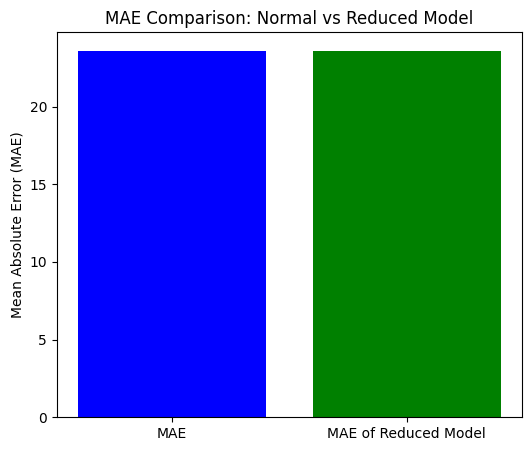

In [24]:
metrics = ['MAE', 'MAE of Reduced Model']
mae_values = [mae, mae_lasso]

plt.figure(figsize=(6, 5))
plt.bar(metrics, mae_values, color=['blue', 'green'])
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE Comparison: Normal vs Reduced Model')
plt.show()

# Notes

Παρατηρούμε ότι οι τιμές του MAE για το αρχικό μοντέλο και για το μοντέλο μετά την αφαίρεση του χαρακτηριστικού με τη χαμηλότερη βαρύτητα είναι πολύ κοντά. Αυτό είναι αναμενόμενο αποτέλεσμα, καθώς αφαιρώντας το χαρακτηριστικό που είχε τη μικρότερη επίδραση στην πρόβλεψη (όπως υποδεικνύεται από τον μικρότερο συντελεστή του στο αρχικό μοντέλο), η συνολική απόδοση του μοντέλου, μετρούμενη με το MAE, δεν αναμένεται να αλλάξει σημαντικά.